https://www.autoregex.xyz/

https://ivanzuzak.info/noam/webapps/fsm2regex/

In [10]:
from graphviz import Digraph

# Initialize the Graphviz object
dot = Digraph('DFA')

# Define the nodes and their shapes
dot.attr(rankdir='LR', size='8,5')
dot.attr('node', shape='doublecircle')
dot.node('A')
dot.node('B')
dot.attr('node', shape='circle')
dot.node('C')

# Initial state arrow
dot.attr('node', shape='point')
dot.node('start')
dot.edge('start', 'A')

# Define the transitions
dot.edge('A', 'A', label='0')
dot.edge('A', 'B', label='1')
dot.edge('B', 'A', label='0')
dot.edge('B', 'C', label='1')
dot.edge('C', 'C', label='0,1')

# Render the output to a file (e.g., DFA.png)
dot.render('DFA', view=True)


'DFA.pdf'

In [11]:
from automata.fa.dfa import DFA

# Define the DFA
dfa = DFA(
    states={'A', 'B', 'C'},
    input_symbols={'0', '1'},
    transitions={
        'A': {'0': 'A', '1': 'B'},
        'B': {'0': 'A', '1': 'C'},
        'C': {'0': 'C', '1': 'C'}
    },
    initial_state='A',
    final_states={'A', 'B'}
)

# Define the input string
input_string = '0101000'

# Check if the input string is accepted by the DFA
if dfa.accepts_input(input_string):
    print(f"The string '{input_string}' is accepted by the DFA.")
else:
    print(f"The string '{input_string}' is not accepted by the DFA.")


The string '0101000' is accepted by the DFA.


In [12]:
from automata.fa.nfa import NFA

# Define the epsilon-NFA
nfa_epsilon = NFA(
    states={'A', 'B', 'C', 'D', 'E', 'F'},
    input_symbols={'0', '1'},
    transitions={
        'A': {'0': {'E'}, '1': {'B'}, '': set()}, # epsilon for state A
        'B': {'1': {'C'}, '': {'D'}},              # epsilon for state B
        'C': {'1': {'D'}},
        'D': {},                                   # no transitions
        'E': {'0': {'F'}, '': {'B', 'C'}},         # epsilon for state E
        'F': {'0': {'D'}}
    },
    initial_state='A',
    final_states={'D'}
)

# Convert to a regular NFA by eliminating epsilon transitions
nfa = nfa_epsilon.eliminate_lambda()


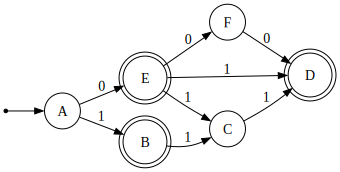

In [13]:
nfa

In [14]:
import exrex

# Define the regular expression for the base pattern
base_pattern = '(0|10)'

# Generate strings for each power from 0 to 5
for n in range(6):
    pattern = base_pattern * n
    generated_strings = list(exrex.generate(pattern))
    print(f"For n={n}, generated strings:")
    print(generated_strings)


For n=0, generated strings:
['']
For n=1, generated strings:
['0', '10']
For n=2, generated strings:
['00', '010', '100', '1010']
For n=3, generated strings:
['000', '0010', '0100', '01010', '1000', '10010', '10100', '101010']
For n=4, generated strings:
['0000', '00010', '00100', '001010', '01000', '010010', '010100', '0101010', '10000', '100010', '100100', '1001010', '101000', '1010010', '1010100', '10101010']
For n=5, generated strings:
['00000', '000010', '000100', '0001010', '001000', '0010010', '0010100', '00101010', '010000', '0100010', '0100100', '01001010', '0101000', '01010010', '01010100', '010101010', '100000', '1000010', '1000100', '10001010', '1001000', '10010010', '10010100', '100101010', '1010000', '10100010', '10100100', '101001010', '10101000', '101010010', '101010100', '1010101010']


In [15]:
from automata.fa.nfa import NFA

# Define the NFA for E = 01* + 10*
nfa = NFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q1'}, '1': {'q3'}},
        'q1': {'1': {'q2'}},
        'q2': {'1': {'q2'}},
        'q3': {'0': {'q4'}},
        'q4': {'0': {'q4'}}
    },
    initial_state='q0',
    final_states={'q2', 'q4'}
)

# Reverse the NFA
reversed_nfa = nfa.reverse()

# Print the transitions of the reversed NFA
print(reversed_nfa.transitions)


frozendict.frozendict({'q4': frozendict.frozendict({'0': frozenset({'q4', 'q3'})}), 0: frozendict.frozendict({'': frozenset({'q4', 'q2'})}), 'q3': frozendict.frozendict({'1': frozenset({'q0'})}), 'q0': frozendict.frozendict({}), 'q1': frozendict.frozendict({'0': frozenset({'q0'})}), 'q2': frozendict.frozendict({'1': frozenset({'q1', 'q2'})})})


In [16]:
import nltk
from nltk.grammar import Nonterminal, CFG
from nltk.parse.generate import generate

# Define the nonterminal
S = Nonterminal('S')

# Create the CFG
grammar = CFG(S, [
    nltk.Production(S, ['0', '1']),
    nltk.Production(S, ['0', S, '1']),
])

# Define the length limit
N = 6

# Generate and print the strings
for sentence in generate(grammar, n=N, depth=N):
    # Convert the list of characters into a string
    sentence_str = ''.join(sentence)

    # Only print strings of valid lengths
    if len(sentence_str) <= N:
        print(sentence_str)

01
0011
000111
